# Project 1

## Problem 1
In the given video, a red ball is thrown against a wall. Assuming that the trajectory of the ball follows the equation of a parabola:

### Problem 1.1
Detect and plot the pixel coordinates of the center point of the ball in the video. (Hint: Read the video using OpenCV’s inbuilt function. For each frame, filter the red channel)

In [83]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [89]:
# Read Video
video = cv.VideoCapture("ball.mov")

# Display Video
if (video.isOpened()== False): 
  print("Error opening video stream or file")

points_list = []

# Read until video is completed
while(video.isOpened()):
  # read frame-by-frame
  ret, frame = video.read()
  if ret == True:
    
    # frame = frame[:-20,100:]
    frame[:,:110] = (0,0,0)
    frame[-20:,:] = (0,0,0)
    hsv_img = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    low = np.array([0,100,100])
    high = np.array([10,255,255])
    mask = cv.inRange(hsv_img,low,high)
    points = np.nonzero(mask)
    points_list.append(points)
    # Display the resulting frame
    cv.imshow('Frame',mask)
 
    # Press Q on keyboard to  exit
    if cv.waitKey(25) & 0xFF == ord('q'):
      break

  else: 
    break

# When everything done, release the video videoture object
video.release()
 
# Closes all the frames
cv.destroyAllWindows()

To calculate the approximate center of the ball. We can take the mean of all the x values and y values of each frame and plot the mean_x and mean_y values to get the trajectory of the center of the ball.

The following code will calculate the mean x and y values and plot them on a graph. We multily the y values with -1 to get the origin on the top left corner as it is in the case of the video / each frame.

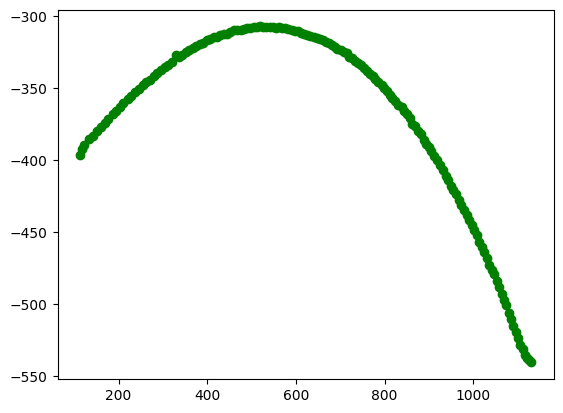

In [90]:
mean_x_list = []
mean_y_list = []

for i in range(len(points_list)):
    if(len(points_list[i][0])>00):
        sum_y = sum(points_list[i][0])
        sum_x = sum(points_list[i][1])
        mean_x = sum_x/len(points_list[i][1])
        mean_y = sum_y/len(points_list[i][0])
        mean_x_list.append(mean_x)
        mean_y_list.append(-mean_y)

plt.scatter(mean_x_list,mean_y_list,color='g')
plt.show()

## Problem 1.2
Use Standard Least Squares to fit a curve to the extracted coordinates. For the estimated
parabola you must

### Problem 1.2 (a)
Print the equation of the curve.

Consider the equation $$ a*x^2 + b*x + c = y $$
This can also be written as $$ \begin{bmatrix} x^2 & x & 1 \end{bmatrix}  \begin{bmatrix} a \\ b \\ c \end{bmatrix} = y $$
which is the form $$ Ax = b $$
We calculate the inverse of A and multiply it with b to get the coefficeint matrix using the formula $$ ((A^T \cdot A)^{-1} \cdot A^T) \cdot b $$

In [91]:
# Consider the equation of the polynomial to be ax^2 + bx + c = y
x_sq = np.array(np.square(mean_x_list[:]))
x = np.array(mean_x_list[:])
ones = np.ones(len(mean_x_list))
X = np.column_stack([x_sq,x,ones])
# X = np.array([x_sq,x,ones]).T
y = mean_y_list[:]

# x_inv = np.linalg.pinv(X)
x_inv = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
coeff = np.dot(x_inv,y)
coeff
y_fit = x_sq*coeff[0] + x*coeff[1] + ones*coeff[2]

print("Y = ",coeff[0],"(X^2) + ",coeff[1],"X + ",coeff[2])


Y =  -0.0006167646995795968 (X^2) +  0.6357659600640303 X +  -468.2024462341543


### Problem 1.2 (b)
Plot the data with your best fit curve

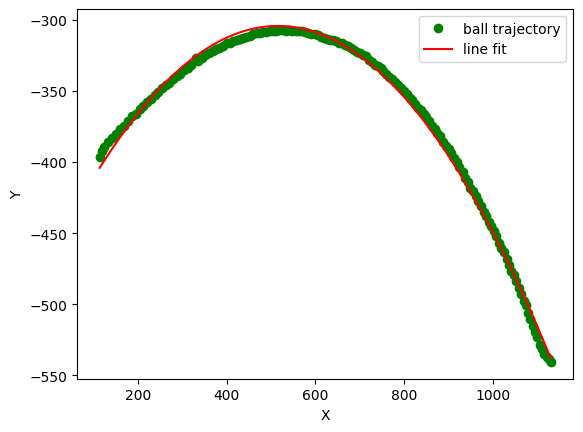

-540.5

In [92]:
plt.plot(mean_x_list,mean_y_list,'go')
plt.plot(x,y_fit,'r')
plt.legend(["ball trajectory","line fit"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
mean_y_list[-1]

## Problem 1.3
Assuming that the origin of the video is at the top-left of the frame as shown below, compute the x-coordinate of the ball’s landing spot in pixels, if the y-coordinate of the landing spot is defined as 300 pixels greater than its first detected location.

In [94]:
y0 = mean_y_list[0]

landing_y = y0 - 300
a = coeff[0]
b = coeff[1]
c = coeff[2] - landing_y

# adding 100 as the frame was cropped for removing mask errors
x1 = -(b + np.sqrt(np.square(b)-(4*a*c)))/(2*a) 
x2 = -(b - np.sqrt(np.square(b)-(4*a*c)))/(2*a)
if x1>0:
    print("The landing spot will be: x = ", x1, "and y = ", abs(landing_y))
else:
    print("The landing spot will be: x = ", x2, "and y = ", abs(landing_y))

The landing spot will be: x =  1312.4759319444856 and y =  696.2095238095238
